In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df= pd.read_excel('pelayanan_barang2023.xlsx')
df.head()

,Nomor Goods Issue / Pelayanan Barang,Tanggal Goods Issue / Pelayanan Barang,Nomor Material,Nama Material,Qty,Satuan,Jenis Material,Lokasi Penyimpanan Gudang
0,4908914576,2023-01-05,10000914,MCB 32A 3 PHASE,2.0,PC,Spare Part,Rak L3 R1 I 2 iii
1,4908914576,2023-01-05,10009413,ISOLASI WARNA MERAH LEBAR 16MM,5.0,PC,Common Goods,Rak L3 R1 S 4 ii c
2,4908914577,2023-01-05,10000914,MCB 32A 3 PHASE,1.0,PC,Spare Part,Rak L3 R1 I 2 iii
3,4908914577,2023-01-05,10009412,ISOLASI WARNA KUNING LEBAR 16MM,5.0,PC,Common Goods,Rak L3 R1 S 4 ii b
4,4908914578,2023-01-05,10000030,FITTING LAMPU PIJAR,12.0,PC,Spare Part,Rak L3 R1 I 4 ii


In [3]:
df.shape

(63706, 8)

In [4]:
df.columns

Index(['Nomor Goods Issue / Pelayanan Barang',
       'Tanggal Goods Issue / Pelayanan Barang', 'Nomor Material',
       'Nama Material', 'Qty', 'Satuan', 'Jenis Material',
       'Lokasi Penyimpanan Gudang'],
      dtype='object')

In [5]:
df.dtypes

Nomor Goods Issue / Pelayanan Barang               int64
Tanggal Goods Issue / Pelayanan Barang    datetime64[ns]
Nomor Material                                     int64
Nama Material                                     object
Qty                                              float64
Satuan                                            object
Jenis Material                                    object
Lokasi Penyimpanan Gudang                         object
dtype: object

In [6]:
df.describe()

,Nomor Goods Issue / Pelayanan Barang,Nomor Material,Qty
count,6.370600e+04,6.370600e+04,63706.000000
mean,4.909544e+09,1.299303e+07,13.747828
std,4.848081e+05,7.679764e+06,41.034868
min,4.908915e+09,1.000000e+07,0.050000
25%,4.909125e+09,1.000734e+07,1.000000
50%,4.909293e+09,1.000954e+07,2.000000
75%,4.909970e+09,1.002719e+07,8.000000
max,4.910691e+09,4.000032e+07,500.000000


In [7]:
df['Nomor Goods Issue / Pelayanan Barang'] = df['Nomor Goods Issue / Pelayanan Barang'].astype('str') 
df['Nomor Material'] = df['Nomor Material'].astype('str')

In [8]:
df.dtypes

Nomor Goods Issue / Pelayanan Barang              object
Tanggal Goods Issue / Pelayanan Barang    datetime64[ns]
Nomor Material                                    object
Nama Material                                     object
Qty                                              float64
Satuan                                            object
Jenis Material                                    object
Lokasi Penyimpanan Gudang                         object
dtype: object

# EDA (Exploratory Data Analysis)

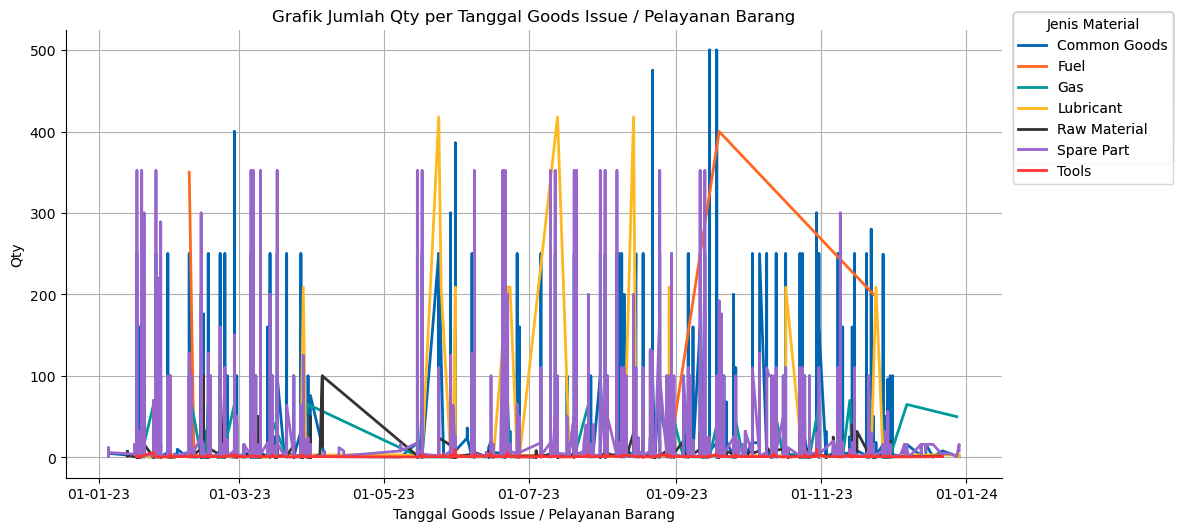

In [9]:
def _plot_series(series, series_name, series_index=0):
    kai_palette = ["#0066B3", "#FF671F", "#009999", "#FFB81F", "#333333", "#9966CC", "#FF3333"]
    xs = series['Tanggal Goods Issue / Pelayanan Barang']
    ys = series['Qty']
  
    plt.plot(xs, ys, label=series_name, color=kai_palette[series_index % len(kai_palette)], linewidth=2)

fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)

df_sorted = df.sort_values('Tanggal Goods Issue / Pelayanan Barang', ascending=True)

for i, (series_name, series) in enumerate(df_sorted.groupby('Jenis Material')):
    _plot_series(series, series_name, i)
    fig.legend(title='Jenis Material', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)

ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%m-%y'))

plt.xlabel('Tanggal Goods Issue / Pelayanan Barang')
plt.ylabel('Qty')
plt.grid(True)

plt.title('Grafik Jumlah Qty per Tanggal Goods Issue / Pelayanan Barang',fontsize=12)
plt.show()

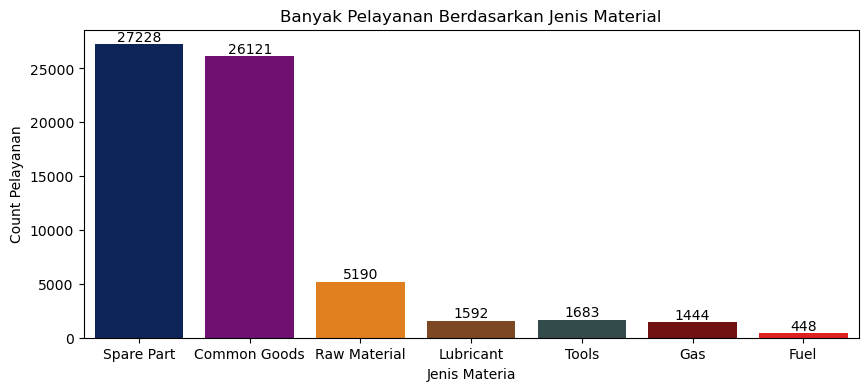

In [10]:
plt.figure(figsize=(10, 4))
custom_palette = ["#001F64", "#800080", "#FF7F00", "#8B4513", "#2F4F4F", "#800000", "#FF0000"]
ax = sns.countplot(x="Jenis Material", data=df, palette=custom_palette)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

plt.title('Banyak Pelayanan Berdasarkan Jenis Material',fontsize=12)
plt.xlabel('Jenis Materia')
plt.ylabel('Count Pelayanan')
plt.show()

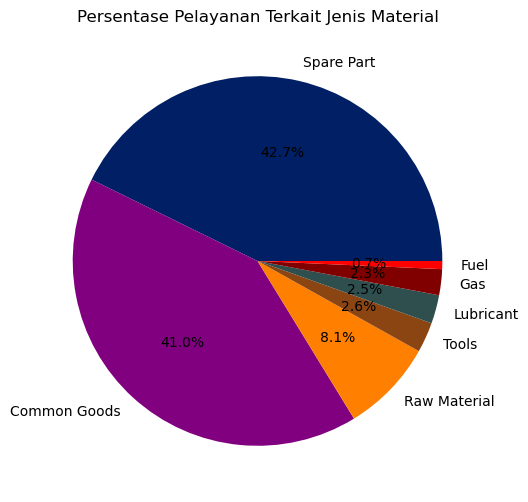

In [11]:
plt.figure(figsize=(6, 6))
custom_palette = ["#001F64", "#800080", "#FF7F00", "#8B4513", "#2F4F4F", "#800000", "#FF0000"]
counts = df['Jenis Material'].value_counts()
counts.plot(kind='pie', autopct=lambda p: '{:.1f}%'.format(p), colors=custom_palette)
plt.title('Persentase Pelayanan Terkait Jenis Material', fontsize=12)
plt.ylabel('')
plt.show()

In [12]:
df['Nama Material'].unique()

array(['MCB 32A 3 PHASE', 'ISOLASI WARNA MERAH LEBAR 16MM',
       'ISOLASI WARNA KUNING LEBAR 16MM', 'FITTING LAMPU PIJAR',
       'ISOLASI WARNA HITAM LEBAR 16MM', 'PLAT KEMBANG UK.2400X1200X4MM',
       'SPRAY OUTFIT;PAINT:AEROSOL;RED', 'DOUBLE SIDE TAPE',
       'BESI SIKU 40X40X4MM', 'PLAT ST. STEEL 2400X1200X3MM',
       'PIPA HITAM DIA 1IN SCH 80 (@6M)',
       'PLAT ALUMINIUM 2400 X 1200 X 11/2MM',
       'PIPA BESI HITAM DIA 1/2IN SCH 80', 'RING VEER DIA 1/2IN',
       'SEAL CUP CARTRIDGE BEARING CLASS C 119MM', 'LOCKING PLAT 119MM',
       'AMPLAS NO. 1', 'SARUNG TANGAN KULIT', 'THINNER',
       'THERMOSTAT COLOUR SENSOR SUHU 708090C', 'MOBILITH SCH 100',
       'KAIN LAP/MAJUN', 'RODA SOLID GOLONGAN CC1',
       'AC SPLIT STANDARD 1.5 PK', 'AC SPLIT 2 PK', 'DUCT TAPE UK.45MM',
       'NOMOR AC SPLIT', 'KNUCKLE; BTC021C010002R2',
       'RING PLAT 1/2IN X 3MM', 'RING VEER DIA 3/8IN', 'RING PLAT 3/8IN',
       'TEE, CABLE 150MM', 'MATA BOR DIA 41/2MM', 'MATA BOR DIA 4MM',
    

In [13]:
item_distribution = df.groupby(by='Nama Material').size().reset_index(name='Permintaan').sort_values(by='Permintaan', ascending=False)
title = "Banyak Transaksi Permintaan Items (Barang)"
print(f"\033[1;30m{title:<80}\033[0m")
item_distribution.head(10)

Banyak Transaksi Permintaan Items (Barang)                                      


,Nama Material,Permintaan
655,RING VEER DIA 1/2IN,1400
676,SARUNG TANGAN KAIN LENGAN PENDEK,1293
857,ZUURSTOP (@7M3),1198
806,TEST SPRAY WD 40,1124
755,SPLIT PEN 6X75MM,958
467,MATA BOR DIA 41/2MM,951
469,MATA BOR DIA 4MM,895
808,THERMOSTAT COLOUR SENSOR SUHU 708090C,873
498,MOBILITH SCH 100,820
460,LOCKING PLAT 119MM,816


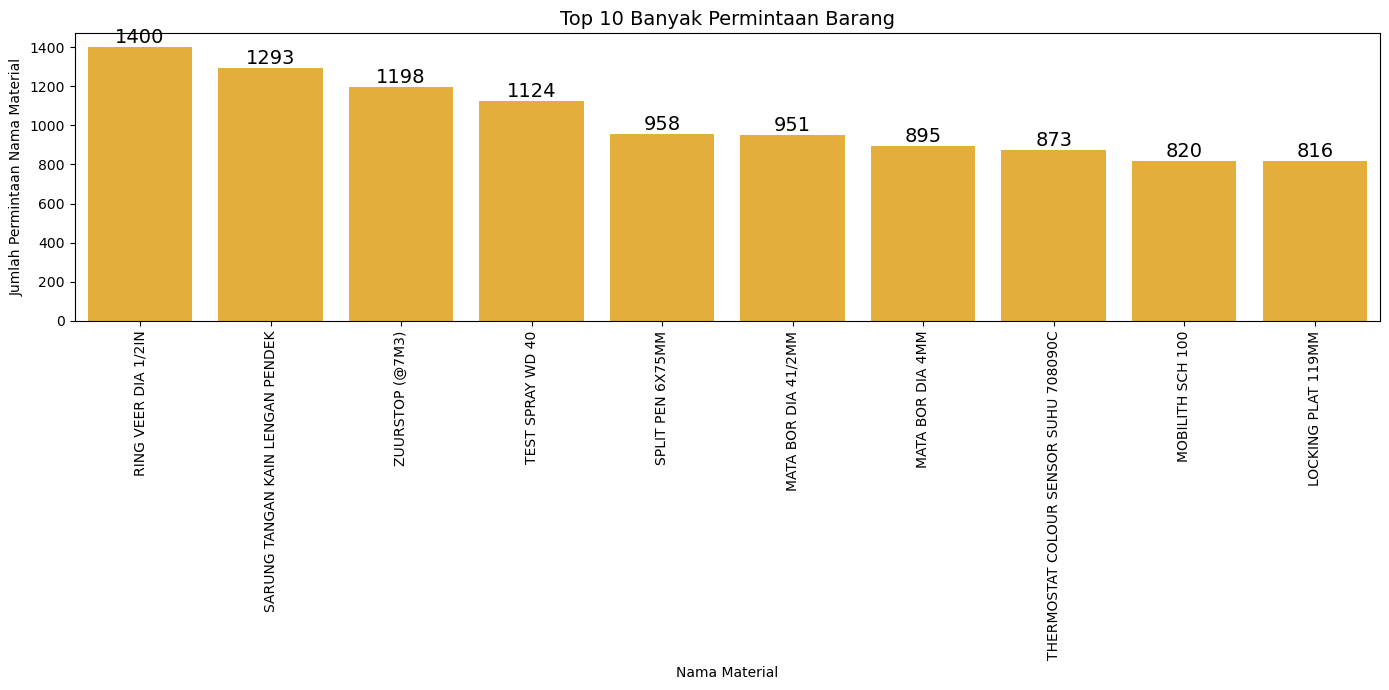

In [14]:
plt.figure(figsize=(14, 7))
top_10_materials = item_distribution.head(10) # Mengambil 10 material teratas dari item_distribution
bar = sns.barplot(x=top_10_materials['Nama Material'], y=top_10_materials['Permintaan'], color='#FFB81F')
bar.set_xticklabels(bar.get_xticklabels(), rotation=90)
plt.ylabel("Jumlah Permintaan Nama Material")
plt.title("Top 10 Banyak Permintaan Barang", fontsize=14)

for index, value in enumerate(top_10_materials['Permintaan']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=14)

plt.tight_layout()
plt.show()

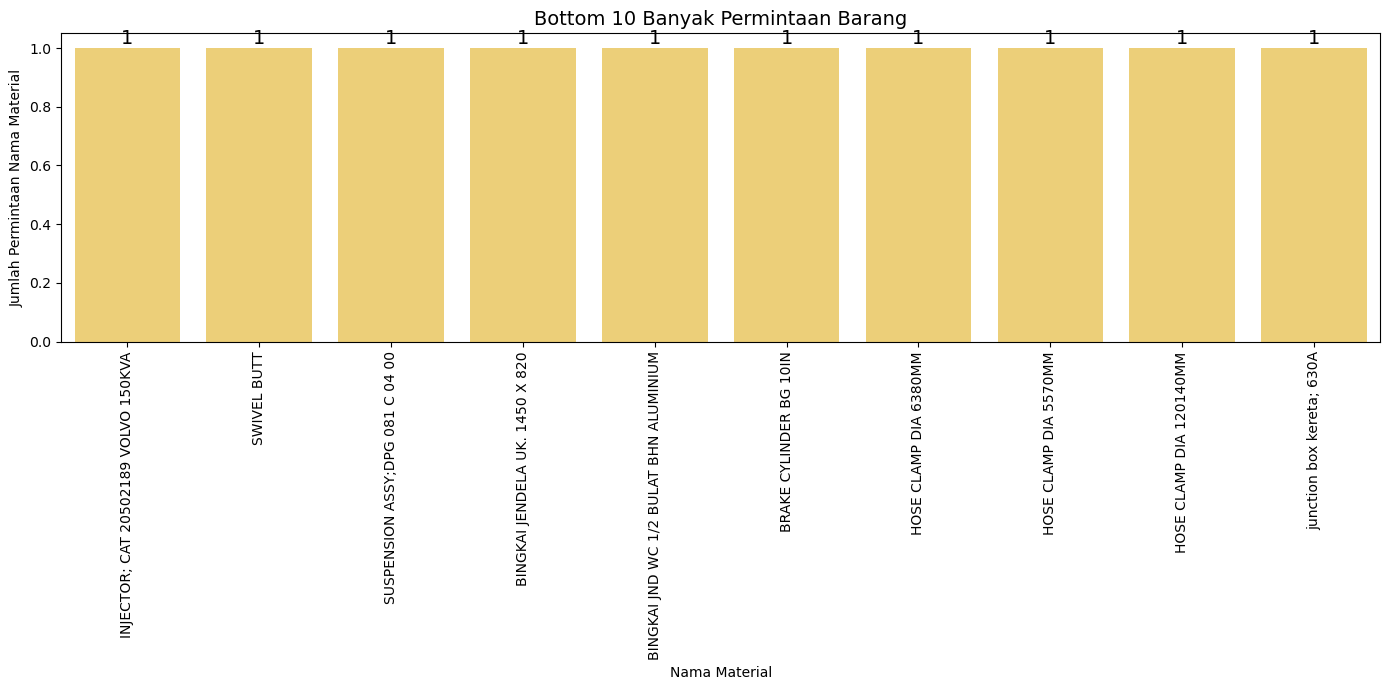

In [15]:
plt.figure(figsize=(14, 7))
bottom_10_materials = item_distribution.tail(10) # Mengambil 10 material terbawah dari item_distribution
bar = sns.barplot(x=bottom_10_materials['Nama Material'], y=bottom_10_materials['Permintaan'], color='#FFD966')
bar.set_xticklabels(bar.get_xticklabels(), rotation=90)
plt.ylabel("Jumlah Permintaan Nama Material")
plt.title("Bottom 10 Banyak Permintaan Barang", fontsize=14)

for index, value in enumerate(bottom_10_materials['Permintaan']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=14)

plt.tight_layout()
plt.show()

In [16]:
n_unique = df.nunique()
print("Jumlah Nilai Unik:\n\n{}".format(n_unique))

Jumlah Nilai Unik:

Nomor Goods Issue / Pelayanan Barang      13215
Tanggal Goods Issue / Pelayanan Barang      189
Nomor Material                              859
Nama Material                               859
Qty                                         116
Satuan                                        7
Jenis Material                                7
Lokasi Penyimpanan Gudang                   703
dtype: int64


In [17]:
df['Jenis Material'].unique()

array(['Spare Part', 'Common Goods', 'Raw Material', 'Lubricant', 'Tools',
       'Gas', 'Fuel'], dtype=object)

In [18]:
df['Satuan'].unique()

array(['PC', 'SET', 'L', 'KG', 'M', 'ROL', 'PAC'], dtype=object)

In [19]:
bulan_tahun = df['Tanggal Goods Issue / Pelayanan Barang'].dt.strftime('%B %Y')
date = df.groupby([bulan_tahun, 'Jenis Material'])['Nomor Goods Issue / Pelayanan Barang'].nunique().sort_values(key=lambda x: pd.to_datetime(x.index.get_level_values(0), format='%B %Y'))
date

Tanggal Goods Issue / Pelayanan Barang  Jenis Material
January 2023                            Tools              150
                                        Spare Part        1122
                                        Raw Material       342
                                        Lubricant          214
                                        Gas                146
                                                          ... 
December 2023                           Spare Part          50
                                        Raw Material         6
                                        Lubricant           25
                                        Common Goods        53
                                        Gas                  3
Name: Nomor Goods Issue / Pelayanan Barang, Length: 77, dtype: int64

In [20]:
nama_bulan = pd.to_datetime(bulan_tahun, format='%B %Y').dt.strftime('%B')
unique_month_names = nama_bulan.unique()
print("\033[1mNama-nama bulan adalah:\033[0m", unique_month_names)
filtered_date = date[date.index.get_level_values(0).str.startswith('February')]
filtered_date

Nama-nama bulan adalah: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


Tanggal Goods Issue / Pelayanan Barang  Jenis Material
February 2023                           Fuel               116
                                        Raw Material       503
                                        Common Goods      1235
                                        Spare Part        1646
                                        Tools              348
                                        Gas                178
                                        Lubricant          262
Name: Nomor Goods Issue / Pelayanan Barang, dtype: int64

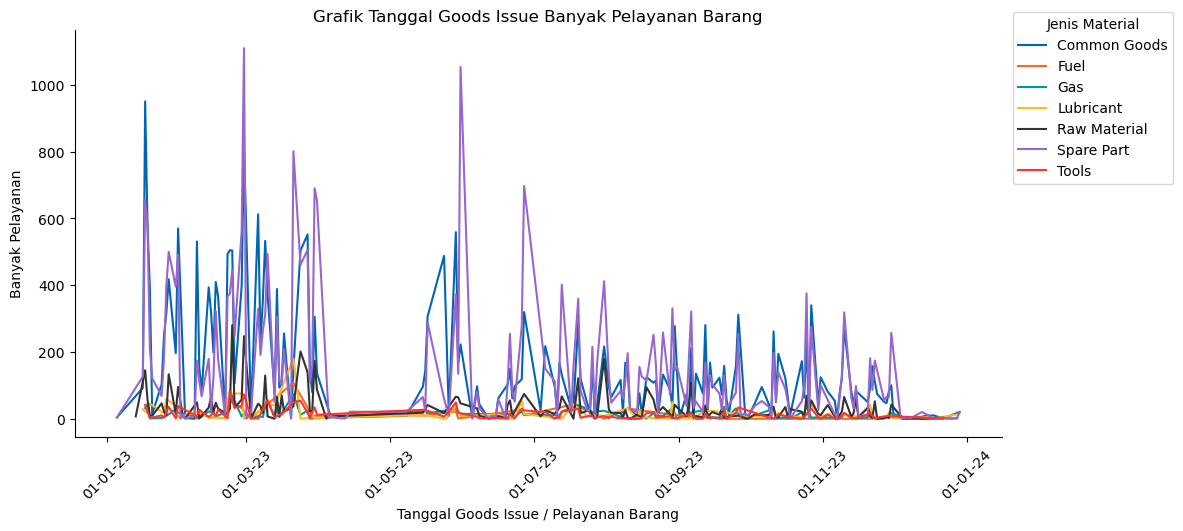

In [21]:
def _plot_series(series, series_name, series_index=0):
    kai_palette = ["#0066B3", "#FF671F", "#009999", "#FFB81F", "#333333", "#9966CC", "#FF3333"]
    counted = (series['Tanggal Goods Issue / Pelayanan Barang']
                   .value_counts()
                   .reset_index(name='counts')
                   .rename({'index': 'Tanggal Goods Issue / Pelayanan Barang'}, axis=1)
                   .sort_values('Tanggal Goods Issue / Pelayanan Barang', ascending=True))
    xs = counted['Tanggal Goods Issue / Pelayanan Barang']
    ys = counted['counts']
    plt.plot(xs, ys, label=series_name, color=kai_palette[series_index % len(kai_palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)
df_sorted = df.sort_values('Tanggal Goods Issue / Pelayanan Barang', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Jenis Material')):
    _plot_series(series, series_name, i)
fig.legend(title='Jenis Material', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.ylabel('Banyak Pelayanan')
plt.xticks(rotation=45)  
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%m-%y'))

plt.title('Grafik Tanggal Goods Issue Banyak Pelayanan Barang', fontsize=12)
plt.xlabel('Tanggal Goods Issue / Pelayanan Barang')
plt.show()


# CLEANING DATA

In [22]:
df.isna().sum()

Nomor Goods Issue / Pelayanan Barang         0
Tanggal Goods Issue / Pelayanan Barang       0
Nomor Material                               0
Nama Material                                0
Qty                                          0
Satuan                                       0
Jenis Material                               0
Lokasi Penyimpanan Gudang                 3116
dtype: int64

In [23]:
data=df.drop(['Lokasi Penyimpanan Gudang'],axis=1)

In [24]:
data.isna().sum()

Nomor Goods Issue / Pelayanan Barang      0
Tanggal Goods Issue / Pelayanan Barang    0
Nomor Material                            0
Nama Material                             0
Qty                                       0
Satuan                                    0
Jenis Material                            0
dtype: int64

In [25]:
data.columns

Index(['Nomor Goods Issue / Pelayanan Barang',
       'Tanggal Goods Issue / Pelayanan Barang', 'Nomor Material',
       'Nama Material', 'Qty', 'Satuan', 'Jenis Material'],
      dtype='object')

In [26]:
data.dtypes

Nomor Goods Issue / Pelayanan Barang              object
Tanggal Goods Issue / Pelayanan Barang    datetime64[ns]
Nomor Material                                    object
Nama Material                                     object
Qty                                              float64
Satuan                                            object
Jenis Material                                    object
dtype: object

# PEMODELAN

In [27]:
marbasket = (data.groupby(['Nomor Goods Issue / Pelayanan Barang', pd.to_datetime(data['Tanggal Goods Issue / Pelayanan Barang']).dt.strftime('%d %B %Y'), 'Nama Material'])['Qty']
             .sum().unstack().reset_index().fillna(0)
             .set_index(['Tanggal Goods Issue / Pelayanan Barang','Nomor Goods Issue / Pelayanan Barang' ]))
marbasket.head()

Nama Material                                                                ABS KULIT JERUK ASH GREY 1220X2440X4MM  \
Tanggal Goods Issue / Pelayanan Barang Nomor Goods Issue / Pelayanan Barang                                           
05 January 2023                        4908914576                                                               0.0   
                                       4908914577                                                               0.0   
                                       4908914578                                                               0.0   
                                       4908914579                                                               0.0   
                                       4908914652                                                               0.0   

Nama Material                                                                ABS KULIT JERUK ASH GREY 750X2440X4MM  \
Tanggal Goods Issue / Pelayanan Barang Nomor Goods Issue / Pelayanan Barang                                          
05 January 2023                        4908914576                                                              0.0   
                                       4908914577                                                              0.0   
                                       4908914578                                                              0.0   
                                       4908914579                                                              0.0   
                                       4908914652                                                              0.0   

Nama Material                                                                AC K1  \
Tanggal Goods Issue / Pelayanan Barang Nomor Goods Issue / Pelayanan Barang          
05 January 2023                        4908914576                              0.0   
                                       4908914577                              0.0   
                                       4908914578                              0.0   
                                       4908914579                              0.0   
                                       4908914652                              0.0   

Nama Material                                                                AC SPLIT 2 PK  \
Tanggal Goods Issue / Pelayanan Barang Nomor Goods Issue / Pelayanan Barang                  
05 January 2023                        4908914576                                      0.0   
                                       4908914577                                      0.0   
                                       4908914578                                      0.0   
                                       4908914579                                      0.0   
                                       4908914652                                      0.0   

Nama Material                                                                AC SPLIT STANDARD 1.5 PK  \
Tanggal Goods Issue / Pelayanan Barang Nomor Goods Issue / Pelayanan Barang                             
05 January 2023                        4908914576                                                 0.0   
                                       4908914577                                                 0.0   
                                       4908914578                                                 0.0   
                                       4908914579                                                 0.0   
                                       4908914652                                                 0.0   

Nama Material                                                                ACCU ZUUR  \
Tanggal Goods Issue / Pelayanan Barang Nomor Goods Issue / Pelayanan Barang              
05 January 2023                        4908914576                                  0.0   
                                       4908914577                      

In [28]:
marbasket.shape

(13215, 859)

In [29]:
def encode_units(x):
    if x > 0:
        return 1
    else:
        return 0

marbasket_sets = marbasket.applymap(encode_units)
marbasket_sets.head()

Nama Material                                                                ABS KULIT JERUK ASH GREY 1220X2440X4MM  \
Tanggal Goods Issue / Pelayanan Barang Nomor Goods Issue / Pelayanan Barang                                           
05 January 2023                        4908914576                                                                 0   
                                       4908914577                                                                 0   
                                       4908914578                                                                 0   
                                       4908914579                                                                 0   
                                       4908914652                                                                 0   

Nama Material                                                                ABS KULIT JERUK ASH GREY 750X2440X4MM  \
Tanggal Goods Issue / Pelayanan Barang Nomor Goods Issue / Pelayanan Barang                                          
05 January 2023                        4908914576                                                                0   
                                       4908914577                                                                0   
                                       4908914578                                                                0   
                                       4908914579                                                                0   
                                       4908914652                                                                0   

Nama Material                                                                AC K1  \
Tanggal Goods Issue / Pelayanan Barang Nomor Goods Issue / Pelayanan Barang          
05 January 2023                        4908914576                                0   
                                       4908914577                                0   
                                       4908914578                                0   
                                       4908914579                                0   
                                       4908914652                                0   

Nama Material                                                                AC SPLIT 2 PK  \
Tanggal Goods Issue / Pelayanan Barang Nomor Goods Issue / Pelayanan Barang                  
05 January 2023                        4908914576                                        0   
                                       4908914577                                        0   
                                       4908914578                                        0   
                                       4908914579                                        0   
                                       4908914652                                        0   

Nama Material                                                                AC SPLIT STANDARD 1.5 PK  \
Tanggal Goods Issue / Pelayanan Barang Nomor Goods Issue / Pelayanan Barang                             
05 January 2023                        4908914576                                                   0   
                                       4908914577                                                   0   
                                       4908914578                                                   0   
                                       4908914579                                                   0   
                                       4908914652                                                   0   

Nama Material                                                                ACCU ZUUR  \
Tanggal Goods Issue / Pelayanan Barang Nomor Goods Issue / Pelayanan Barang              
05 January 2023                        4908914576                                    0   
                                       4908914577                      

In [30]:
# Filyter transaksi yang memiliki jumlah item yang dibeli lebih dari atau sama dengan 2
Transaksfreks = marbasket_sets[(marbasket_sets.sum(axis=1) >= 2)]
print(f"\033[1m\033[14mJumlah transaksi yang memiliki lebih dari atau sama dengan 2 item: {len(Transaksfreks)}\033[0m")
Transaksfreks.head()

Jumlah transaksi yang memiliki lebih dari atau sama dengan 2 item: 7670


Nama Material                                                                ABS KULIT JERUK ASH GREY 1220X2440X4MM  \
Tanggal Goods Issue / Pelayanan Barang Nomor Goods Issue / Pelayanan Barang                                           
05 January 2023                        4908914576                                                                 0   
                                       4908914577                                                                 0   
                                       4908914578                                                                 0   
                                       4908914652                                                                 0   
13 January 2023                        4908947857                                                                 0   

Nama Material                                                                ABS KULIT JERUK ASH GREY 750X2440X4MM  \
Tanggal Goods Issue / Pelayanan Barang Nomor Goods Issue / Pelayanan Barang                                          
05 January 2023                        4908914576                                                                0   
                                       4908914577                                                                0   
                                       4908914578                                                                0   
                                       4908914652                                                                0   
13 January 2023                        4908947857                                                                0   

Nama Material                                                                AC K1  \
Tanggal Goods Issue / Pelayanan Barang Nomor Goods Issue / Pelayanan Barang          
05 January 2023                        4908914576                                0   
                                       4908914577                                0   
                                       4908914578                                0   
                                       4908914652                                0   
13 January 2023                        4908947857                                0   

Nama Material                                                                AC SPLIT 2 PK  \
Tanggal Goods Issue / Pelayanan Barang Nomor Goods Issue / Pelayanan Barang                  
05 January 2023                        4908914576                                        0   
                                       4908914577                                        0   
                                       4908914578                                        0   
                                       4908914652                                        0   
13 January 2023                        4908947857                                        0   

Nama Material                                                                AC SPLIT STANDARD 1.5 PK  \
Tanggal Goods Issue / Pelayanan Barang Nomor Goods Issue / Pelayanan Barang                             
05 January 2023                        4908914576                                                   0   
                                       4908914577                                                   0   
                                       4908914578                                                   0   
                                       4908914652                                                   0   
13 January 2023                        4908947857                                                   0   

Nama Material                                                                ACCU ZUUR  \
Tanggal Goods Issue / Pelayanan Barang Nomor Goods Issue / Pelayanan Barang              
05 January 2023                        4908914576                                    0   
                                       4908914577                      

In [31]:
Transaksfreks.shape

(7670, 859)

In [32]:
# Mendapatkan daftar item dari transaksi yang memenuhi syarat
marbasket_sets_items = Transaksfreks.apply(lambda row: list(Transaksfreks.columns[row.astype(bool)]), axis=1)
# Membuat DataFrame dari daftar item
marbasket_sets_items = pd.DataFrame({'Items': marbasket_sets_items})
# Menambahkan kolom length dan melihat jumlah barang per transaksi
marbasket_sets_items['Length'] = marbasket_sets_items['Items'].apply(len)

In [33]:
marbasket_sets_items.head()

Items  \
Tanggal Goods Issue / Pelayanan Barang Nomor Goods Issue / Pelayanan Barang                                                      
05 January 2023                        4908914576                            [ISOLASI WARNA MERAH LEBAR 16MM, MCB 32A 3 PHASE]   
                                       4908914577                            [ISOLASI WARNA KUNING LEBAR 16MM, MCB 32A 3 PH...   
                                       4908914578                            [FITTING LAMPU PIJAR, ISOLASI WARNA HITAM LEBA...   
                                       4908914652                            [DOUBLE SIDE TAPE, SPRAY OUTFIT;PAINT:AEROSOL;...   
13 January 2023                        4908947857                            [BESI SIKU 40X40X4MM, PLAT ST. STEEL 2400X1200...   

                                                                             Length  
Tanggal Goods Issue / Pelayanan Barang Nomor Goods Issue / Pelayanan Barang          
05 January 2023                        4908914576                                 2  
                                       4908914577                                 2  
                                       4908914578                                 3  
                                       4908914652                                 2  
13 January 2023                        4908947857                                 2

In [34]:
marbasket_sets_items.tail()

Items  \
Tanggal Goods Issue / Pelayanan Barang Nomor Goods Issue / Pelayanan Barang                                                      
29 December 2023                       4910690228                            [MOBILITH SCH 100, PLASTIK BENING (@45M/ROL), ...   
                                       4910690229                            [MOBILITH SCH 100, PLASTIK BENING (@45M/ROL), ...   
                                       4910690270                            [MOBILITH SCH 100, PLASTIK BENING (@45M/ROL), ...   
                                       4910690271                            [MOBILITH SCH 100, PLASTIK BENING (@45M/ROL), ...   
                                       4910690273                            [CARTRIDGE BEARING CLASS C DIA 119MM, PLASTIK ...   

                                                                             Length  
Tanggal Goods Issue / Pelayanan Barang Nomor Goods Issue / Pelayanan Barang          
29 December 2023                       4910690228                                 3  
                                       4910690229                                 3  
                                       4910690270                                 3  
                                       4910690271                                 3  
                                       4910690273                                 3

In [35]:
print("\n\033[1mBanyak Transaksi Barang berdasarkan Index Variabel\033[0m")
max_length = marbasket_sets_items['Length'].max()
min_length = marbasket_sets_items['Length'].min()
print("Transaksi pelayanan tertinggi sejumlah :", max_length)
print("Transaksi pelayanan terendah sejumlah:", min_length)


Banyak Transaksi Barang berdasarkan Index Variabel
Transaksi pelayanan tertinggi sejumlah : 49
Transaksi pelayanan terendah sejumlah: 2


# Penerapan Algoritma Apriori

In [36]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [37]:
frequent_itemsets = apriori(Transaksfreks.astype('bool'), min_support=0.05, use_colnames=True)
sorted_frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
sorted_frequent_itemsets.head()

,support,itemsets
15,0.182529,(RING VEER DIA 1/2IN)
17,0.164928,(SARUNG TANGAN KAIN LENGAN PENDEK)
27,0.146023,(ZUURSTOP (@7M3))
24,0.143937,(TEST SPRAY WD 40)
21,0.122164,(SPLIT PEN 6X75MM)


In [38]:
sorted_frequent_itemsets.tail()

,support,itemsets
95,0.050717,"(THERMOSTAT COLOUR SENSOR SUHU 708090C, MINYAK..."
93,0.050717,"(MINYAK TANAH, MOBILITH SCH 100, RING VEER DIA..."
73,0.050717,"(MINYAK TANAH, MOBILITH SCH 100, SEAL CUP CART..."
20,0.050587,(SPLIT PEN 3X50MM)
51,0.050326,"(RING VEER DIA 1/2IN, SARUNG TANGAN KAIN LENGA..."


In [39]:
frequent_itemsets['frequency'] = frequent_itemsets['itemsets'].apply(
    lambda x: Transaksfreks[list(x)].all(axis=1).sum()
)
frequent_itemsets.head()

,support,itemsets,frequency
0,0.083442,(AFDUNNER),640
1,0.063885,(BATU GERINDA 100X16X6MM),490
2,0.085919,(CAT CHASIS BLACK 901 BL),659
3,0.056193,(DEGREASER DAN CLEANER),431
4,0.087484,(GULFLEX ICX 2),671


In [40]:
frequent_itemsets.tail()

,support,itemsets,frequency
97,0.082269,"(THERMOSTAT COLOUR SENSOR SUHU 708090C, MOBILI...",631
98,0.056714,"(RING VEER DIA 1/2IN, SPLIT PEN 6X75MM, RING P...",435
99,0.054498,"(LOCKING PLAT 119MM, THERMOSTAT COLOUR SENSOR ...",418
100,0.075619,"(LOCKING PLAT 119MM, THERMOSTAT COLOUR SENSOR ...",580
101,0.050717,"(THERMOSTAT COLOUR SENSOR SUHU 708090C, MINYAK...",389


In [41]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=1)
rules.sort_values(by='support', ascending=False)
rules.drop(['antecedent support', 'consequent support', 'leverage', 'conviction', 'zhangs_metric','lift'], axis=1).head()

,antecedents,consequents,support,confidence
0,(MINYAK TANAH),(RING VEER DIA 1/2IN),0.058018,1.0
1,"(MINYAK TANAH, LOCKING PLAT 119MM)",(RING VEER DIA 1/2IN),0.054628,1.0
2,"(MINYAK TANAH, LOCKING PLAT 119MM)",(THERMOSTAT COLOUR SENSOR SUHU 708090C),0.054628,1.0
3,"(MINYAK TANAH, MOBILITH SCH 100)",(RING VEER DIA 1/2IN),0.057236,1.0
4,"(MINYAK TANAH, MOBILITH SCH 100)",(THERMOSTAT COLOUR SENSOR SUHU 708090C),0.057236,1.0


filtered_rules = rules[rules['lift'] >= 9]  # Filter aturan dengan lift setidaknya 1
filtered_rules

In [42]:
apriori_evaluate = association_rules(frequent_itemsets, metric='lift', min_threshold=9)
analisisi_rules = apriori_evaluate[apriori_evaluate['confidence'] >= 1] 
sorter_caselute = analisisi_rules.sort_values('lift', ascending=False)
sorter_caselute.drop(['antecedent support', 'consequent support', 'leverage', 'conviction', 'zhangs_metric'], axis=1)

,antecedents,consequents,support,confidence,lift
175,"(SPLIT PEN 6X75MM, RING PLAT 11/4IN)","(RING VEER DIA 1/2IN, SPLIT PEN 8X120MM)",0.056714,1.0,16.530172
62,"(SPLIT PEN 6X75MM, RING PLAT 11/4IN)",(SPLIT PEN 8X120MM),0.056714,1.0,14.893204
170,"(SPLIT PEN 6X75MM, RING VEER DIA 1/2IN, RING P...",(SPLIT PEN 8X120MM),0.056714,1.0,14.893204
92,"(MINYAK TANAH, LOCKING PLAT 119MM)","(THERMOSTAT COLOUR SENSOR SUHU 708090C, RING V...",0.054628,1.0,9.599499
136,"(MINYAK TANAH, MOBILITH SCH 100)","(THERMOSTAT COLOUR SENSOR SUHU 708090C, RING V...",0.057236,1.0,9.599499
158,"(MINYAK TANAH, SEAL CUP CARTRIDGE BEARING CLAS...","(THERMOSTAT COLOUR SENSOR SUHU 708090C, RING V...",0.050847,1.0,9.599499
186,"(LOCKING PLAT 119MM, MINYAK TANAH, MOBILITH SC...","(THERMOSTAT COLOUR SENSOR SUHU 708090C, RING V...",0.054498,1.0,9.599499
235,"(MINYAK TANAH, MOBILITH SCH 100, SEAL CUP CART...","(THERMOSTAT COLOUR SENSOR SUHU 708090C, RING V...",0.050717,1.0,9.599499


# Hasil Anslisis :

In [43]:
from tabulate import tabulate

In [44]:
table_data = []
for _, rule in sorter_caselute.iterrows():
    support = rule['support']
    confidence = rule['confidence']
    lift = rule['lift']
    antecedents = ", ".join([str(item) for item in rule['antecedents']])
    consequents = ", ".join([str(item) for item in rule['consequents']])
    rule_text = f"{antecedents} => {consequents}"
    table_data.append([support, confidence, lift, rule_text])

# Header tabel
headers = ["Support", "Confidence", "Lift", "Rule"]
# Tampilkan output menggunakan tabulate
print(tabulate(table_data, headers=headers, floatfmt=".4f"))

  Support    Confidence     Lift  Rule
---------  ------------  -------  --------------------------------------------------------------------------------------------------------------------------------------
   0.0567        1.0000  16.5302  SPLIT PEN 6X75MM, RING PLAT 11/4IN => RING VEER DIA 1/2IN, SPLIT PEN 8X120MM
   0.0567        1.0000  14.8932  SPLIT PEN 6X75MM, RING PLAT 11/4IN => SPLIT PEN 8X120MM
   0.0567        1.0000  14.8932  SPLIT PEN 6X75MM, RING VEER DIA 1/2IN, RING PLAT 11/4IN => SPLIT PEN 8X120MM
   0.0546        1.0000   9.5995  MINYAK TANAH, LOCKING PLAT 119MM => THERMOSTAT COLOUR SENSOR SUHU 708090C, RING VEER DIA 1/2IN
   0.0572        1.0000   9.5995  MINYAK TANAH, MOBILITH SCH 100 => THERMOSTAT COLOUR SENSOR SUHU 708090C, RING VEER DIA 1/2IN
   0.0508        1.0000   9.5995  MINYAK TANAH, SEAL CUP CARTRIDGE BEARING CLASS C 119MM => THERMOSTAT COLOUR SENSOR SUHU 708090C, RING VEER DIA 1/2IN
   0.0545        1.0000   9.5995  LOCKING PLAT 119MM, MINYAK TANAH, MOBIL